In [1]:
import tensorflow as tf
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import os

In [3]:
print(tf. __version__)

2.8.0


In [2]:
# Load the data
data_path = 'snapshots_20_J10'
file_names = os.listdir(data_path)
data = []
labels = []
for file_name in file_names:
    temperature = float(file_name.split('_')[1])/100  # Extract the temperature from the file name
    if temperature <= 22.6:  # Ordered phase
        label = 0
    else:  # Disordered phase
        label = 1
    file_path = os.path.join(data_path, file_name)
    with open(file_path, 'r') as f:
        file_data = np.loadtxt(f)
        file_data = np.expand_dims(file_data, axis=-1)  # Add a channel dimension
        data.append(file_data)
        labels.append(label)
data = np.array(data)
labels = np.array(labels)

In [3]:
np.shape(data)

(20000, 20, 20, 1)

In [4]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(20,20,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                36928     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(data, labels, epochs=50, validation_split=0.2)

Epoch 1/50
500/500 [==============================] - 8s 8ms/step - loss: 0.4525 - accuracy: 0.7721 - val_loss: 0.2608 - val_accuracy: 0.9555
Epoch 2/50
500/500 [==============================] - 4s 8ms/step - loss: 0.3851 - accuracy: 0.8123 - val_loss: 0.6632 - val_accuracy: 0.6827
Epoch 3/50
500/500 [==============================] - 4s 7ms/step - loss: 0.3728 - accuracy: 0.8179 - val_loss: 0.2819 - val_accuracy: 0.9348
Epoch 4/50
500/500 [==============================] - 4s 7ms/step - loss: 0.3593 - accuracy: 0.8247 - val_loss: 0.4157 - val_accuracy: 0.8528
Epoch 5/50
500/500 [==============================] - 4s 8ms/step - loss: 0.3509 - accuracy: 0.8322 - val_loss: 0.3838 - val_accuracy: 0.8730
Epoch 6/50
500/500 [==============================] - 4s 8ms/step - loss: 0.3454 - accuracy: 0.8359 - val_loss: 0.2206 - val_accuracy: 0.9532
Epoch 7/50
500/500 [==============================] - 4s 7ms/step - loss: 0.3336 - accuracy: 0.8413 - val_loss: 0.2659 - val_accuracy: 0.9365
Epoch 

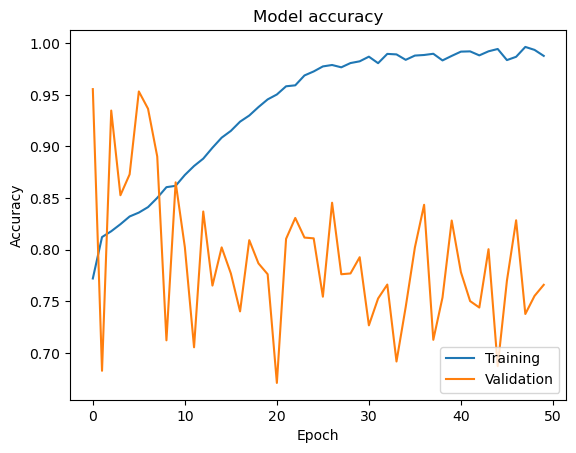

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

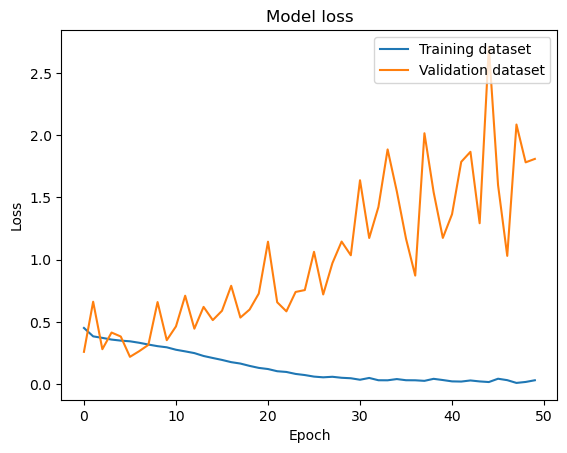

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training dataset', 'Validation dataset'], loc='upper right')
plt.show()

In [11]:
# Load the test data
data_path = 'test_20_J10_misclassification'
file_names = os.listdir(data_path)
test_data = []
test_labels = []
for file_name in file_names:
    temperature = float(file_name.split('_')[1])/100  # Extract the temperature from the file name
    if temperature <= 22.6:  # Ordered phase
        label = 0
    else:  # Disordered phase
        label = 1
    file_path = os.path.join(data_path, file_name)
    with open(file_path, 'r') as f:
        file_data = np.loadtxt(f)
        file_data = np.expand_dims(file_data, axis=-1)  # Add a channel dimension
        test_data.append(file_data)
        test_labels.append(label)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [12]:
test_loss, test_acc = model.evaluate(test_data, test_labels, batch_size=10)

978/978 [==============================] - 5s 5ms/step - loss: 4.5418 - accuracy: 0.5075


In [15]:
for i in range(98):
    test_loss, test_acc = model.evaluate(test_data[i*100:(i+1)*100], test_labels[i*100:(i+1)*100], batch_size=5)

15/15 [==============================] - 0s 5ms/step - loss: 4.8725 - accuracy: 0.5211


In [16]:
len(test_data)

9771

In [17]:
test_loss, test_acc = model.evaluate(test_data, test_labels, batch_size=10)

978/978 [==============================] - 5s 5ms/step - loss: 4.5418 - accuracy: 0.5075


In [18]:
for i in range(98):
    test_loss, test_acc = model.evaluate(test_data[i*100:(i+1)*100], test_labels[i*100:(i+1)*100], batch_size=5)

15/15 [==============================] - 0s 6ms/step - loss: 4.8725 - accuracy: 0.5211


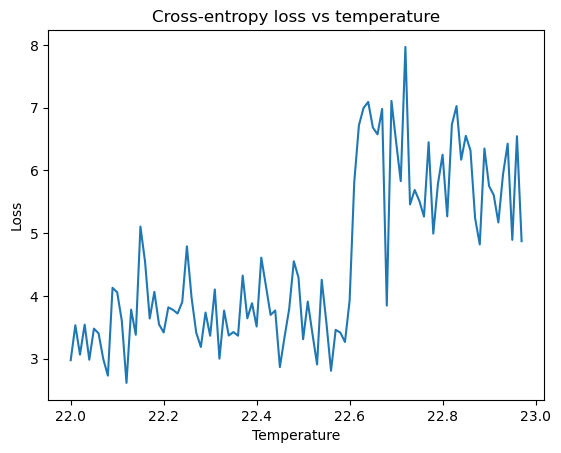

In [19]:
loss_list = [2.9769,
3.5341,
3.0653,
3.5437,
2.9852,
3.4803,
3.4039,
2.9979,
2.7316,
4.1302,
4.0583,
3.6018,
2.6151,
3.7818,
3.3822,
5.1058,
4.5426,
3.6412,
4.0659,
3.5481,
3.4189,
3.8189,
3.7789,
3.721,
3.9058,
4.7905,
3.9753,
3.4172,
3.1878,
3.7356,
3.3669,
4.1035,
3.0006,
3.7681,
3.3699,
3.4253,
3.3674,
4.3248,
3.6441,
3.885,
3.5133,
4.6104,
4.1593,
3.698,
3.7688,
2.8681,
3.3453,
3.794,
4.5534,
4.2946,
3.3108,
3.9108,
3.4016,
2.9092,
4.258,
3.5789,
2.8083,
3.4605,
3.4176,
3.2669,
3.9257,
5.8154,
6.717,
6.995,
7.0906,
6.684,
6.5742,
6.9793,
3.8466,
7.1079,
6.4573,
5.8286,
7.967,
5.458,
5.6885,
5.5149,
5.2644,
6.4491,
4.9939,
5.7851,
6.2505,
5.2681,
6.7302,
7.0248,
6.1711,
6.5517,
6.3189,
5.2371,
4.8204,
6.3486,
5.7509,
5.6076,
5.1708,
5.9358,
6.4263,
4.8939,
6.5452,
4.8725,
]
bins = [22+0.01*i for i in range(98)]
plt.plot(bins, loss_list)
plt.title('Cross-entropy loss vs temperature')
plt.ylabel('Loss')
plt.xlabel('Temperature')
#plt.legend(['Training dataset', 'Validation dataset'], loc='upper right')
plt.show()

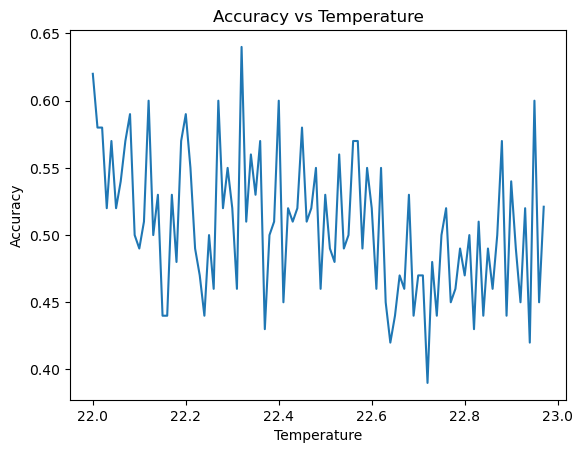

In [20]:
acc_list = [0.62,
0.58,
0.58,
0.52,
0.57,
0.52,
0.54,
0.57,
0.59,
0.5,
0.49,
0.51,
0.6,
0.5,
0.53,
0.44,
0.44,
0.53,
0.48,
0.57,
0.59,
0.55,
0.49,
0.47,
0.44,
0.5,
0.46,
0.6,
0.52,
0.55,
0.52,
0.46,
0.64,
0.51,
0.56,
0.53,
0.57,
0.43,
0.5,
0.51,
0.6,
0.45,
0.52,
0.51,
0.52,
0.58,
0.51,
0.52,
0.55,
0.46,
0.53,
0.49,
0.48,
0.56,
0.49,
0.5,
0.57,
0.57,
0.49,
0.55,
0.52,
0.46,
0.55,
0.45,
0.42,
0.44,
0.47,
0.46,
0.53,
0.44,
0.47,
0.47,
0.39,
0.48,
0.44,
0.5,
0.52,
0.45,
0.46,
0.49,
0.47,
0.5,
0.43,
0.51,
0.44,
0.49,
0.46,
0.5,
0.57,
0.44,
0.54,
0.49,
0.45,
0.52,
0.42,
0.6,
0.45,
0.5211,
]
plt.plot(bins, acc_list)
plt.title('Accuracy vs Temperature')
plt.ylabel('Accuracy')
plt.xlabel('Temperature')
#plt.legend(['Training dataset', 'Validation dataset'], loc='upper right')
plt.show()